# Introduction to Scikit-Learn

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library

What we are going to cover

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

# 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease = pd.read_csv("data/011 heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X 
X  = heart_disease.drop("target", axis=1)

# Create Y
Y = heart_disease["target"]

In [3]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to  the training data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
clf.fit(X_train, Y_train);

In [14]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2


In [13]:
# make a prediction
Y_label  = clf.predict(np.array([0,2,3,4]))

C:\Users\Pc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [16]:
Y_test

191    0
27     1
250    0
260    0
154    1
      ..
221    0
280    0
215    0
53     1
299    0
Name: target, Length: 61, dtype: int64

In [17]:
# 4. Evaluate the model
clf.score(X_train, Y_train)

1.0

In [18]:
clf.score(X_test, Y_test)

0.8524590163934426

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.87      0.84      0.85        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [22]:
confusion_matrix(Y_test, y_preds)

array([[26,  4],
       [ 5, 26]], dtype=int64)

In [23]:
accuracy_score(Y_test, y_preds)

0.8524590163934426

In [24]:
# 5. Improve a model
# Try  a different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,Y_train )
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test) *100:.2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 85.25%
 
Trying model with 20 estimators...
Model accuracy on test set: 91.80%
 
Trying model with 30 estimators...
Model accuracy on test set: 90.16%
 
Trying model with 40 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 50 estimators...
Model accuracy on test set: 91.80%
 
Trying model with 60 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 70 estimators...
Model accuracy on test set: 90.16%
 
Trying model with 80 estimators...
Model accuracy on test set: 90.16%
 
Trying model with 90 estimators...
Model accuracy on test set: 88.52%
 


In [25]:
# 6. Save a model and  load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [26]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, Y_test)

0.8852459016393442

# 0. Getting Data Ready 

Three main things to do:

    1. Split the data into features and labels( usually x and y)
    2. Filling or diregarding missing values
    3. Converting non-numerical data into numerical data ( Feature encoding )

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# axis = 1 means the columns axis x
# axis = 0 means the rows axis y


X  = heart_disease.drop("target", axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [7]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

### 1.1 Make sure it is all mumerical

In [8]:
car_sales = pd.read_csv("data/car-sales-extended.csv");
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [9]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [10]:
# Split the data 
X   = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Build a ml model#
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [13]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)] , remainder  = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [14]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [15]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [17]:
# Let's refit the model
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y,
                                                   test_size = 0.2)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.1870531368170122

### 1.2 What if there is missing values

1. Fill them with some value (also known as imputation)
2. Remove the samples with the missing values

In [5]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [7]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [6]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [8]:
# convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)] , remainder  = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1 Fill the missing data with Pandas

In [12]:
# 1. Fill the 'Make' column
car_sales_missing["Make"].fillna("missing", inplace=True)

#Fill th e'Color' column
car_sales_missing["Colour"].fillna("missing", inplace=True)

#Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace = True)

In [13]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [14]:
# Remove rows with missing values
car_sales_missing.dropna(inplace = True)

In [15]:
len(car_sales_missing)

950

In [16]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [18]:
# convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)] , remainder  = "passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2. Fill missing values using scikit-learn

In [20]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [22]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [24]:
car_sales_missing.dropna(subset = ["Price"] , inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [25]:
# Split into x and y

X = car_sales_missing.drop("Price", axis = 1)
y  = car_sales_missing["Price"]

In [26]:
# Fill missing values with scikit learn with Scikit Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill the categorical value with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills the missing data)

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [28]:
car_sales_filled  = pd.DataFrame(filled_X, columns = ["Make", "Colour", "Doors", "Odometer (KM)"])

In [29]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [30]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [31]:
# convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)] , remainder  = "passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [32]:
# NOW WE HAVE GOT OUR DATA AS NUMBERS AND FILLED 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(transformed_X, y, test_size=0.2)

model  = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

# Choosing the right estimator/ algorithm for your problem

Some Things to note

* Sklearn refers to machine learning models, algorithms as estimators
* Classificaiton problem - predicting a category (heart disease or not)
    * Sometimes you will see `clf` (short for classifier ) used as a classification estimator
* Regression problem - predicting a number (such as the selling price of a car)

If you are working on a ML and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map

## 2.1 Picking A machine learning model for a regression problem

Let's use the California Housing Dataset

In [1]:
# Get the  California Housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [2]:
import pandas as pd
import numpy as np

In [3]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df
                          

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
housing_df = housing_df.drop("MedHouseVal", axis=1)

KeyError: "['MedHouseVal'] not found in axis"

In [10]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
# Import the algorithm
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#setup random seed 
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"] # Median house price in $100,000

# Spli the data into train and test sets
X_train, X_test , y_train, y_test = train_test_split(X,y , test_size = 0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440128

What if `Ridge` didn't work for the score didn't fit our needs?

Well, we could alwayss try a different model...

How about we try an ensemble model (an Ensemble is a combination of smaller models to trying and make better predictions than just a single model) ?

In [10]:
# import the Random Forest Regressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# setup the random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis= 1)
y = housing_df["target"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Create random forest model 
model =  RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score
model.score(X_test, y_test)

0.8065734772187598

## 2.2 Picking a ML model for a classification model


In [11]:
heart_disease = pd.read_csv("data/011 heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [12]:
# import th e LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test  = train_test_split(X, y , test_size = 0.2)

# Instantiate the model
model = LinearSVC()
model.fit(X_train, y_train)

# Test the model
model.score(X_test,y_test)


C:\Users\Pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [19]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [21]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test  = train_test_split(X, y , test_size = 0.2)

# Instantiate the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Test the model
clf.score(X_test,y_test)


0.8524590163934426

TIDBIT:
    
    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

## 3.FIT the model/ algorithm on our data and use it to make a prediction
3.1 Fitting the model to the data

Different names for:

* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [25]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test  = train_test_split(X, y , test_size = 0.2)

# Instantiate the model
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Test the model (use the patterns the machine learning model has learned)
clf.score(X_test,y_test)


0.8524590163934426

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:

    1. predict()
    2. predict_proba()

In [26]:
 # Use a trained model to make predictions

clf.predict(np.array([1,2,3,5,7]))

C:\Users\Pc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 5. 7.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [27]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [29]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [30]:
# Compare predictions to truth tables to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [33]:
 # Make predictions with predict_proba() which returns probabilties of a classification label
clf.predict_proba(X_test[:5])

    

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [34]:
# lets predict on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [13]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# Split the data
X_train , X_test , y_train, y_test = train_test_split(X, y , test_size = 0.2)

# create the model instance 
model = RandomForestRegressor()

# Fit the model to the data 
model.fit(X_train, y_train)

# Make predictions 
y_preds = model.predict(X_test)

In [38]:
np.array(y_preds[:10])

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [39]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [40]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [14]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [42]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a Model

Three ways to evaluate a Scikit-Learn models/estimators:

    1. Estimator's built-in `score()` method
    2. The `scoring` Parameter
    3. Problem-specific metric functions

### 4.1 Evaluating a model with the `score` method

In [43]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test  = train_test_split(X, y , test_size = 0.2)

# Instantiate the model
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)



RandomForestClassifier()

In [44]:
# the highest value for the score method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [47]:
clf.score(X_test, y_test) 

0.8524590163934426

Let's use the `score()` on our regression problem ...

In [14]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# Split the data
X_train , X_test , y_train, y_test = train_test_split(X, y , test_size = 0.2)

# create the model instance 
model = RandomForestRegressor()

# Fit the model to the data 
model.fit(X_train, y_train)


RandomForestRegressor()

In [15]:
# The default score() evaluation metric is r_squared for regressions algorithim
model.score(X_train, y_train) 

0.9736801960414609

In [16]:
model.score(X_test, y_test)

0.8065734772187598

### 4.2 Evaluating a model using the `scoring` parameter

In [15]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test  = train_test_split(X, y , test_size = 0.2)

# Instantiate the model
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train);

In [16]:
clf.score(X_test, y_test)

0.8524590163934426

In [17]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [20]:
np.random.seed(42)

# Single tiaining and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of the 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

#Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Default scoring parameter of the classifier  = mean accuracy
clf.score()

In [21]:
# Scoring parameter is set to none by default
cross_val_score(clf, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

 ### 4.2.1 Classification model evaluation metrics
    
    1. Accuracy
    2. Area under ROC Curve
    3. Confusion Matrix
    4. Classification report
    
   ** Accuracy

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = heart_disease.drop("target" ,axis =1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [24]:
np.mean(cross_val_score)

0.8248087431693989

In [23]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the Reciever Operating Characteristic Curve (AUC/ROC)

    * Area Under Curve (AUC)
    * ROC Curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

* True positive = model predicts 1 when truth is 1 
* False postive  = model predicts 1 when truth is 0
* True negative  = model predicts 0 when truth is 0
* False negative  = model predicts 0 when truth is 0

In [24]:
 # create X_test ... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [26]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [27]:
# calculate fpr, tpr and thresholds 
fpr, tpr , thresholds  = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

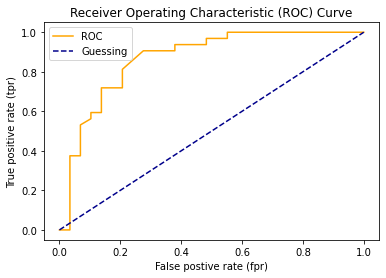

In [28]:
# create a function for plotting ROC Curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """"
    Plots a ROC curve given the false positive rate (fpr) and
    true positive rate (tpr) of a model
    """
    
    # Plot roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = "darkblue", linestyle = "--", label = "Guessing")
    
    # Customise the plot
    plt.xlabel("False postive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

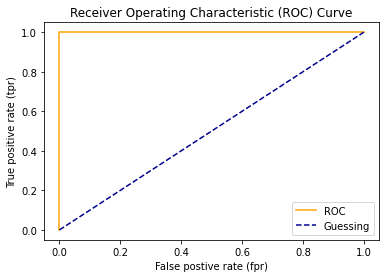

In [30]:
# plot perfect ROC Curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [31]:
# Perfect AUC score 
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix** 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In essence, giving you and idea of where the model is getting confused.

In [32]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [33]:
# Visualize confusion matrix with the pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames = ["Actual Label"],
           colnames= ["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [ ]:
# How to install a conda package into the current environment from a Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

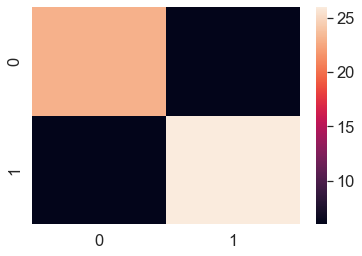

In [34]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# set the font scale
sns.set(font_scale  =1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

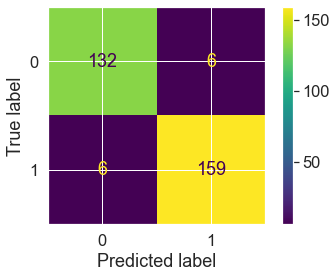

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator = clf , X = X, y=y);

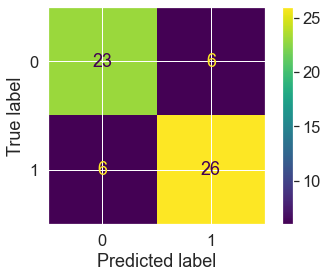

In [37]:
ConfusionMatrixDisplay.from_predictions(y_true= y_test, y_pred = y_preds);

**Classification Report**

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [40]:
# Where precision and recall become valuable
disease_true  = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # Model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))


C:\Users\Pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics: 

   * **Accuracy** is a good measure to start with if all classes are balanced (e.g same amount of sample data)
    * **Precision** and **recall** become more important when classes are imbalanced.
    * If false positive predictions are worse than false negatives, aim for higher precision
    * If false negative predictions are worse than false positive, aim for higher recall
    * **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

The ones we're going to cover are :

1. R^2 or coefficient of determination
2. Mean absolute error(MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: It compares your model's predictions to the mean target

In [41]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# Split the data
X_train , X_test , y_train, y_test = train_test_split(X, y , test_size = 0.2)

# create the model instance 
model = RandomForestRegressor()

# Fit the model to the data 
model.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
model.score(X_test, y_test)

0.8065734772187598

In [43]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [44]:
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [45]:
r2_score(y_true=y_test,
        y_pred = y_test_mean)

0.0

In [46]:
r2_score(y_true=y_test,
        y_pred = y_test)

1.0

**Mean Absolute Error**(MAE)

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your model predictions are.

In [47]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [48]:
df = pd.DataFrame(data= {"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [50]:
np.abs(df["differences"]).mean()

0.32659871732073803

**Mean Sqaured Error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [51]:
# MSE
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [52]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [53]:
# calculate mse by hand
squared = np.square(df["differences"])
squared.mean()

0.25346785208245565

 ### 4.2.3 Finally using the scoring parameter


In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(24)

X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [60]:
np.random.seed(42)

# Cross validation accuracy 
cv_acc = cross_val_score(clf, X, y, scoring=None) # if scoring = None default (accuracy) is used
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [58]:
# Cross-Validated accuracy
print(f"The cross-validated accuracy is :{np.mean(cv_acc) *100:.2f} %")

The cross-validated accuracy is :82.16 %


In [59]:
np.random.seed(42)
cv_precision = cross_val_score(clf ,X ,y, scoring= "precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [61]:
# Cross-Validated precision
print(f"The cross-validated precision is :{np.mean(cv_precision) *100:.2f} %")

The cross-validated precision is :83.30 %


In [62]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf , X, y, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [63]:
# Cross-Validated recall
print(f"The cross-validated recall is :{np.mean(cv_recall) *100:.2f} %")

The cross-validated recall is :85.45 %


Let's see the `scoring` parameter being used for regression model

In [64]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# Split the data
X_train , X_test , y_train, y_test = train_test_split(X, y , test_size = 0.2)

# create the model instance 
model = RandomForestRegressor()


In [65]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3 , scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [66]:
# Mean Absolute Error 
cv_mae = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
np.mean(cv_mae)

-0.4303784827892982

In [67]:
# Mean squared error
cv_mse = cross_val_score(model, X,y,scoring = "neg_mean_absolute_error")
np.mean(cv_mse)

-0.46680736586240323

## 4.3 Using different evaluation metrics as Scikit-Learn functions

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf= RandomForestClassifier()

clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds) * 100:.2f}%")
print(f"F1: {f1_score(y_test, y_preds) * 100:.2f}%")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y= housing_df["target"]

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

Regression metrics on the test set
R2 score: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


##5. Improving a model

First predictions = baseline predictions.
First model = basseline model.

From a data perspective:
* Could we collect more data ?
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model? 

Hyperparameters vs. Parameters
* Parameters = model finds these patterns in data
* Hyperparameters = settings on a model you can adjust to potentially improve its ability to find patterns

Three ways to ajust hyperparameters:
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [70]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()


In [71]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test

We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [85]:
def evaluate_preds(y_true, y_preds):
    """
    Perfoms evaluation comparison on y_true labels vs. y_preds labels
    on a classification
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1,2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
          
    return metric_dict

In [86]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis =1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of the data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

# len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [ ]:
clf_3 = RandomForestClassifier(max_depth=10)

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [88]:

from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 20, 100, 500, 1000, 1200],
        "max_depth": [None, 5,10,20,30],
       "max_features": ["auto", "sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4]
       } 

np.random.seed(29)

# Split into x and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into the train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                           param_distributions = grid,
                           n_iter = 10, # number of models to try,
                           cv =5,
                           verbose = 2)

# Fit the RandomizedSearchCV version of the clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total 

In [89]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [90]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 83.61%
Precision: 0.88
Recall: 0.88
F1 score: 0.88


### 5.3 Hyperparameter tuning with GridSearchCV

In [91]:
grid


{'n_estimators': [10, 20, 100, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [92]:
grid_2 = {'n_estimators': [500, 1000, 1200],
 'max_depth': [5],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [ 4],
 'min_samples_leaf': [1, 2]}

In [94]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(29)

# Split into x and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into the train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                           param_grid = grid_2,
                           cv =5,
                           verbose = 2)

# Fit the GridSearchCV version of the clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; tot

In [95]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500}

In [96]:
gs_y_preds = gs_clf.predict(X_test)

# Evalute the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.88
Recall: 0.85
F1 score: 0.86


Let's compare our different models metrics.

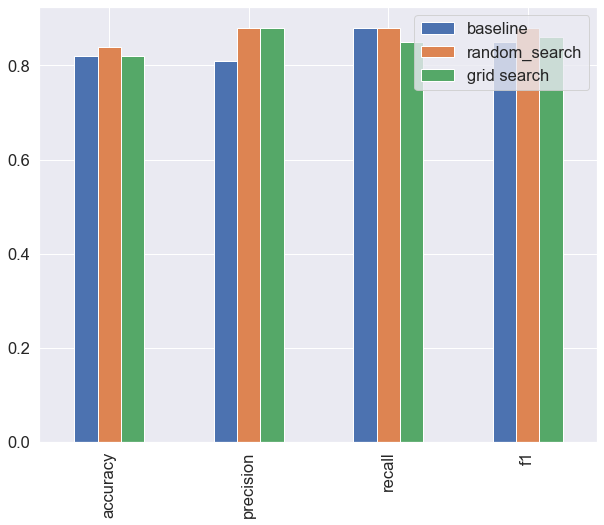

In [98]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                              "random_search": rs_metrics,
                              "grid search": gs_metrics})

compare_metrics.plot.bar(figsize = (10 ,8));